In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from wordcloud import WordCloud
import datetime as datetime
import os

In [2]:
p_in="../data/for_pred_vis"
preds=sorted(os.listdir(p_in))

In [3]:
p_in

'../data/preds_vis'

In [422]:
#preds

In [629]:
dfs=[]
for p in preds[1:]:
    df=pd.read_csv(p_in+p)
    if 'all_bot' in p:
        df['bot_cat']='not astroturfs'
    else:
        df['bot_cat']='astrotufs'
    if p.split("_")[1]=='a':
        df['type']='amount'
    else:
         df['type']='sentiment'
    if '65' in p:
        df['cutoff']="65"
    elif "70" in p:
        df['cutoff']="70"
    elif "75" in p:
        df['cutoff']="75"
    elif "80" in p:
        df['cutoff']="80"
    dfs.append(df)
all_pred=pd.concat(dfs).drop_duplicates()

In [630]:
all_pred

,bot_interaction,after,interaction_senti,retweet_count_original,like_count_interaction,burstiness,topic,ols_pred,ols_low,ols_up,bot_cat,type,cutoff
0,0,0,0.003185,30.481013,1.791139,-0.002093,1,-0.014724,-0.255258,0.225810,astrotufs,amount,65
1,1,0,0.003185,30.481013,1.791139,-0.002093,1,-0.631905,-0.839694,-0.424116,astrotufs,amount,65
2,0,1,0.003185,30.481013,1.791139,-0.002093,1,-0.248981,-0.491857,-0.006106,astrotufs,amount,65
3,1,1,0.003185,30.481013,1.791139,-0.002093,1,-0.410891,-0.617107,-0.204675,astrotufs,amount,65
0,0,0,0.108011,14.483283,2.866261,0.002801,1,-0.661679,-0.861245,-0.462112,not astroturfs,amount,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,1,1,0.003185,30.481013,1.791139,-0.002093,2,-0.360102,-0.471648,-0.248556,astrotufs,sentiment,80
0,0,0,0.108011,14.483283,2.866261,0.002801,2,-0.610264,-0.875211,-0.345317,not astroturfs,sentiment,80
1,1,0,0.108011,14.483283,2.866261,0.002801,2,-0.801663,-1.135619,-0.467706,not astroturfs,sentiment,80
2,0,1,0.108011,14.483283,2.866261,0.002801,2,-0.491706,-0.756653,-0.226759,not astroturfs,sentiment,80


In [620]:
#df1_after_bot

In [631]:
all_pred2=all_pred

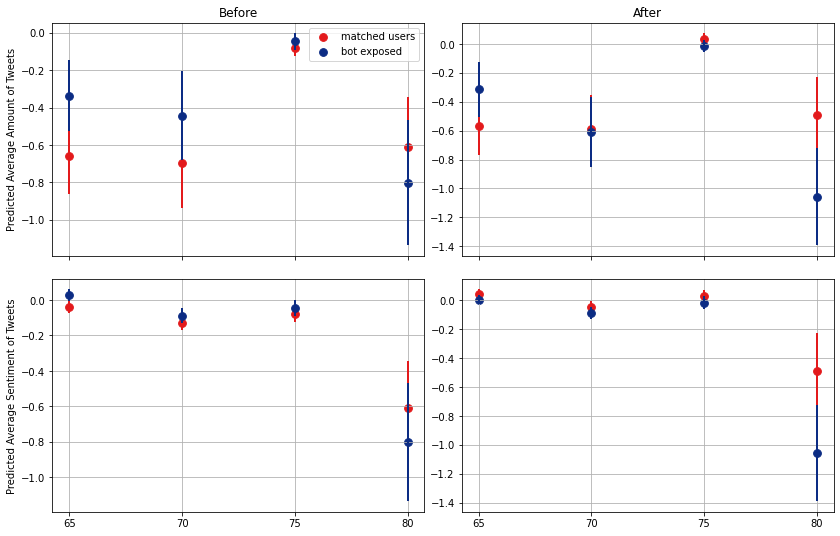

In [632]:
fig, axs = plt.subplots(2, 2, figsize=(14, 9), gridspec_kw={"hspace":0.1, "wspace":0.1}, sharex=True)

all_pred=all_pred2[all_pred2['bot_cat']=='not astroturfs']

bot_color = "#0C2C84"
human_color = "#E31A1C"

df1_before_human=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==0)]
ax1=axs[0][0]
ax1.scatter(x=list(df1_before_human['cutoff']), y=list(df1_before_human['ols_pred']), s=60, color=human_color, label='matched users')

ax1.vlines(x=list(df1_before_human['cutoff']), 
           ymin=list(df1_before_human['ols_low']),
               ymax=list(df1_before_human['ols_up']), linewidth=2, color=human_color,alpha=1)


df1_before_bot=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==0) 
                        & (all_pred["bot_interaction"]==1)]
ax1=axs[0][0]
ax1.scatter(x=list(df1_before_bot['cutoff']), y=list(df1_before_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax1.vlines(x=list(df1_before_bot['cutoff']), ymin=list(df1_before_bot['ols_low']),
               ymax=list(df1_before_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax1.grid()
ax1.set_title("Before")


df1_after_human=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==1) 
                         & (all_pred["bot_interaction"]==0)]
ax2=axs[0][1]
ax2.scatter(x=list(df1_after_human['cutoff']), y=list(df1_after_human['ols_pred']), s=60, color=human_color, label='matched users')

ax2.vlines(x=list(df1_after_human['cutoff']), 
           ymin=list(df1_after_human['ols_low']),
               ymax=list(df1_after_human['ols_up']), 
           linewidth=2, color=human_color,alpha=1)


df1_after_bot=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==1) & (all_pred["bot_interaction"]==1)]
ax2.scatter(x=list(df1_after_bot['cutoff']), 
            y=list(df1_after_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax2.vlines(x=list(df1_after_bot['cutoff']), 
           ymin=list(df1_after_bot['ols_low']),
               ymax=list(df1_after_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax2.grid()
ax2.set_title("After")
ax1.set_ylabel("Predicted Average Amount of Tweets")


#SENTIMENT
df2_before_human=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==0) & (all_pred["bot_interaction"]==0)]
ax3=axs[1][0]
ax3.scatter(x=list(df2_before_human['cutoff']), y=list(df2_before_human['ols_pred']), s=60, color=human_color, label='matched users')

ax3.vlines(x=list(df2_before_human['cutoff']), ymin=list(df2_before_human['ols_low']),
               ymax=list(df2_before_human['ols_up']), linewidth=2, color=human_color,alpha=1)


df2_before_bot=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==0) & (all_pred["bot_interaction"]==1)]
ax3.scatter(x=list(df2_before_bot['cutoff']), y=list(df2_before_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax3.vlines(x=list(df2_before_bot['cutoff']), ymin=list(df2_before_bot['ols_low']),
               ymax=list(df2_before_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax3.grid()
#ax1.set_title("Before")


df2_after_human=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==1) 
                         & (all_pred["bot_interaction"]==0)]
ax4=axs[1][1]
ax4.scatter(x=list(df2_after_human['cutoff']), y=list(df2_after_human['ols_pred']), s=60, color=human_color, label='matched users')

ax4.vlines(x=list(df2_after_human['cutoff']), ymin=list(df2_after_human['ols_low']),
               ymax=list(df2_after_human['ols_up']), linewidth=2, color=human_color,alpha=1)


df2_after_bot=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==1) 
                       & (all_pred["bot_interaction"]==1)]
ax4.scatter(x=list(df2_after_bot['cutoff']), y=list(df2_after_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax4.vlines(x=list(df2_after_bot['cutoff']), ymin=list(df2_after_bot['ols_low']),
               ymax=list(df2_after_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax4.grid()
#ax2.set_title("After")
ax3.set_ylabel("Predicted Average Sentiment of Tweets")

ax1.legend()

In [633]:
#se_amount=[0.120, 0.128, 0.148,0.348]
#se_senti=[0.018,0.019,0.023,0.048]

bot_human_senti_before_diff=df2_before_bot['ols_pred'].reset_index()-df2_before_human['ols_pred'].reset_index()
bot_human_senti_after_diff=df2_after_bot['ols_pred'].reset_index()-df2_after_human['ols_pred'].reset_index()
human_senti_diff=df2_before_human.set_index('cutoff')[['ols_pred']]-df2_after_human.set_index('cutoff')[['ols_pred']]
bot_senti_diff=df2_before_bot.set_index('cutoff')[['ols_pred']]-df2_after_bot.set_index('cutoff')[['ols_pred']]
S_rel_diff=human_senti_diff-bot_senti_diff
human_amount_diff=df1_before_human.set_index('cutoff')[['ols_pred']]-df1_after_human.set_index('cutoff')[['ols_pred']]
bot_amount_diff=df1_before_bot.set_index('cutoff')[['ols_pred']]-df1_after_bot.set_index('cutoff')[['ols_pred',]]
A_rel_diff=human_amount_diff-bot_amount_diff
S_rel_diff=human_senti_diff-bot_senti_diff


se_amount_na=[0.148, 0.162,0.200,93.966]
se_senti_na=[0.023,0.026,0.029,0.104]
 

A_rel_diff['SE']=se_amount_na
S_rel_diff['SE']=se_senti_na

A_rel_diff['min']=A_rel_diff['ols_pred']-1.96*A_rel_diff['SE']
A_rel_diff['max']=A_rel_diff['ols_pred']+1.96*A_rel_diff['SE']
S_rel_diff['min']=S_rel_diff['ols_pred']-1.96*S_rel_diff['SE']
S_rel_diff['max']=S_rel_diff['ols_pred']+1.96*S_rel_diff['SE']

S_rel_diff2=S_rel_diff[:-1]
A_rel_diff2=A_rel_diff[:-1]

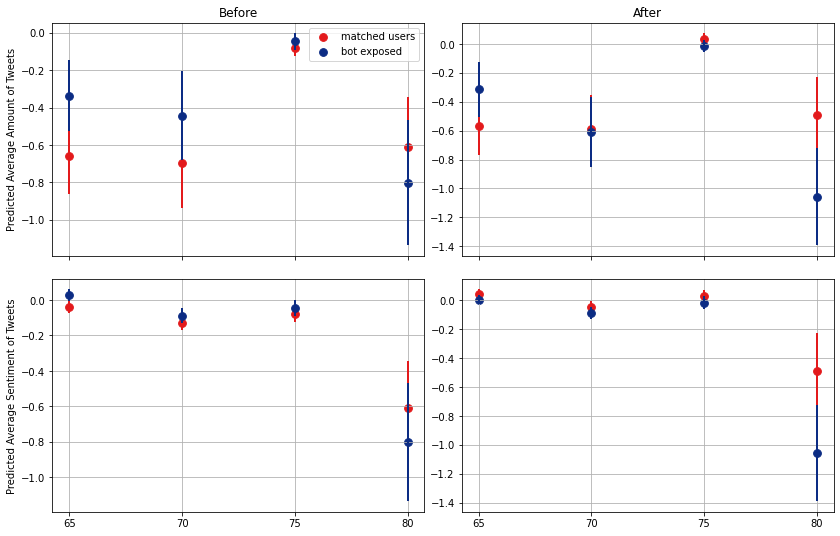

In [634]:
fig, axs = plt.subplots(2, 2, figsize=(14, 9), gridspec_kw={"hspace":0.1, "wspace":0.1}, sharex=True)

all_pred=all_pred2[all_pred2['bot_cat']=='not astroturfs']

bot_color = "#0C2C84"
human_color = "#E31A1C"

df1_before_human=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==0)]
ax1=axs[0][0]
ax1.scatter(x=list(df1_before_human['cutoff']), y=list(df1_before_human['ols_pred']), s=60, color=human_color, label='matched users')

ax1.vlines(x=list(df1_before_human['cutoff']), 
           ymin=list(df1_before_human['ols_low']),
               ymax=list(df1_before_human['ols_up']), linewidth=2, color=human_color,alpha=1)


df1_before_bot=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==0) 
                        & (all_pred["bot_interaction"]==1)]
ax1=axs[0][0]
ax1.scatter(x=list(df1_before_bot['cutoff']), y=list(df1_before_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax1.vlines(x=list(df1_before_bot['cutoff']), ymin=list(df1_before_bot['ols_low']),
               ymax=list(df1_before_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax1.grid()
ax1.set_title("Before")


df1_after_human=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==1) 
                         & (all_pred["bot_interaction"]==0)]
ax2=axs[0][1]
ax2.scatter(x=list(df1_after_human['cutoff']), y=list(df1_after_human['ols_pred']), s=60, color=human_color, label='matched users')

ax2.vlines(x=list(df1_after_human['cutoff']), 
           ymin=list(df1_after_human['ols_low']),
               ymax=list(df1_after_human['ols_up']), 
           linewidth=2, color=human_color,alpha=1)


df1_after_bot=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==1) & (all_pred["bot_interaction"]==1)]
ax2.scatter(x=list(df1_after_bot['cutoff']), 
            y=list(df1_after_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax2.vlines(x=list(df1_after_bot['cutoff']), 
           ymin=list(df1_after_bot['ols_low']),
               ymax=list(df1_after_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax2.grid()
ax2.set_title("After")
ax1.set_ylabel("Predicted Average Amount of Tweets")


#SENTIMENT
df2_before_human=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==0) & (all_pred["bot_interaction"]==0)]
ax3=axs[1][0]
ax3.scatter(x=list(df2_before_human['cutoff']), y=list(df2_before_human['ols_pred']), s=60, color=human_color, label='matched users')

ax3.vlines(x=list(df2_before_human['cutoff']), ymin=list(df2_before_human['ols_low']),
               ymax=list(df2_before_human['ols_up']), linewidth=2, color=human_color,alpha=1)


df2_before_bot=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==0) & (all_pred["bot_interaction"]==1)]
ax3.scatter(x=list(df2_before_bot['cutoff']), y=list(df2_before_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax3.vlines(x=list(df2_before_bot['cutoff']), ymin=list(df2_before_bot['ols_low']),
               ymax=list(df2_before_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax3.grid()
#ax1.set_title("Before")


df2_after_human=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==1) 
                         & (all_pred["bot_interaction"]==0)]
ax4=axs[1][1]
ax4.scatter(x=list(df2_after_human['cutoff']), y=list(df2_after_human['ols_pred']), s=60, color=human_color, label='matched users')

ax4.vlines(x=list(df2_after_human['cutoff']), ymin=list(df2_after_human['ols_low']),
               ymax=list(df2_after_human['ols_up']), linewidth=2, color=human_color,alpha=1)


df2_after_bot=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==1) 
                       & (all_pred["bot_interaction"]==1)]
ax4.scatter(x=list(df2_after_bot['cutoff']), y=list(df2_after_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax4.vlines(x=list(df2_after_bot['cutoff']), ymin=list(df2_after_bot['ols_low']),
               ymax=list(df2_after_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax4.grid()
#ax2.set_title("After")
ax3.set_ylabel("Predicted Average Sentiment of Tweets")

ax1.legend()

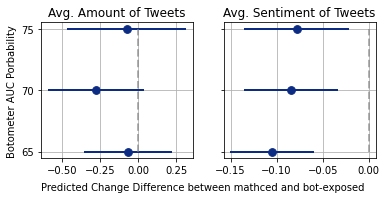

In [635]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2.5
                                      ), sharey=True)



ax1=axs[0]
ax1.scatter(y=list(A_rel_diff2.index), x=list(A_rel_diff2['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax1.hlines(y=list(A_rel_diff2.index), xmin=list(A_rel_diff2['min']),
               xmax=list(A_rel_diff2['max']), linewidth=2, color=bot_color,alpha=1)
ax1.grid()
ax1.set_title("Avg. Amount of Tweets")

ax2=axs[1]
ax2.scatter(y=list(S_rel_diff2.index), x=list(S_rel_diff2['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax2.hlines(y=list(S_rel_diff2.index), xmin=list(S_rel_diff2['min']),
               xmax=list(S_rel_diff2['max']), linewidth=2, color=bot_color,alpha=1)
ax2.grid()
ax2.set_title("Avg. Sentiment of Tweets")
ax1.vlines(x=0, ymin=-0.01, ymax=2.01,ls='dashed', lw=2,color="grey", alpha=0.6)
ax2.vlines(x=0, ymin=-0.01, ymax=2.01,ls='dashed', lw=2,color="grey", alpha=0.6)
#ax1.set_xlim(-.85,0.8)
#ax2.set_xlim(-.9,0.1)
ax1.set_ylabel("Botometer AUC Porbability")
fig.text(0.5, -0.05, "Predicted Change Difference between mathced and bot-exposed", ha='center')
plt.savefig("Predicted_change_diff_allcutoff.pdf")

In [636]:
all_pred2

,bot_interaction,after,interaction_senti,retweet_count_original,like_count_interaction,burstiness,topic,ols_pred,ols_low,ols_up,bot_cat,type,cutoff
0,0,0,0.003185,30.481013,1.791139,-0.002093,1,-0.014724,-0.255258,0.225810,astrotufs,amount,65
1,1,0,0.003185,30.481013,1.791139,-0.002093,1,-0.631905,-0.839694,-0.424116,astrotufs,amount,65
2,0,1,0.003185,30.481013,1.791139,-0.002093,1,-0.248981,-0.491857,-0.006106,astrotufs,amount,65
3,1,1,0.003185,30.481013,1.791139,-0.002093,1,-0.410891,-0.617107,-0.204675,astrotufs,amount,65
0,0,0,0.108011,14.483283,2.866261,0.002801,1,-0.661679,-0.861245,-0.462112,not astroturfs,amount,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,1,1,0.003185,30.481013,1.791139,-0.002093,2,-0.360102,-0.471648,-0.248556,astrotufs,sentiment,80
0,0,0,0.108011,14.483283,2.866261,0.002801,2,-0.610264,-0.875211,-0.345317,not astroturfs,sentiment,80
1,1,0,0.108011,14.483283,2.866261,0.002801,2,-0.801663,-1.135619,-0.467706,not astroturfs,sentiment,80
2,0,1,0.108011,14.483283,2.866261,0.002801,2,-0.491706,-0.756653,-0.226759,not astroturfs,sentiment,80


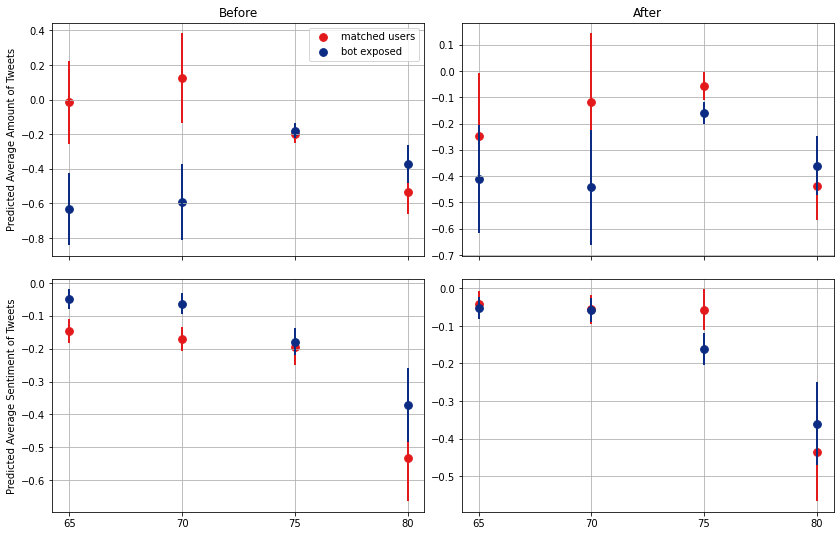

In [637]:
fig, axs = plt.subplots(2, 2, figsize=(14, 9), gridspec_kw={"hspace":0.1, "wspace":0.1}, sharex=True)

all_pred=all_pred2[all_pred2['bot_cat']=='astrotufs']

bot_color = "#0C2C84"
human_color = "#E31A1C"

df1_before_human=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==0)]
ax1=axs[0][0]
ax1.scatter(x=list(df1_before_human['cutoff']), y=list(df1_before_human['ols_pred']), s=60, color=human_color, label='matched users')

ax1.vlines(x=list(df1_before_human['cutoff']), 
           ymin=list(df1_before_human['ols_low']),
               ymax=list(df1_before_human['ols_up']), linewidth=2, color=human_color,alpha=1)


df1_before_bot=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==0) 
                        & (all_pred["bot_interaction"]==1)]
ax1=axs[0][0]
ax1.scatter(x=list(df1_before_bot['cutoff']), y=list(df1_before_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax1.vlines(x=list(df1_before_bot['cutoff']), ymin=list(df1_before_bot['ols_low']),
               ymax=list(df1_before_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax1.grid()
ax1.set_title("Before")


df1_after_human=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==1) 
                         & (all_pred["bot_interaction"]==0)]
ax2=axs[0][1]
ax2.scatter(x=list(df1_after_human['cutoff']), y=list(df1_after_human['ols_pred']), s=60, color=human_color, label='matched users')

ax2.vlines(x=list(df1_after_human['cutoff']), 
           ymin=list(df1_after_human['ols_low']),
               ymax=list(df1_after_human['ols_up']), 
           linewidth=2, color=human_color,alpha=1)


df1_after_bot=all_pred[(all_pred["type"]=='amount') & (all_pred["after"]==1) & (all_pred["bot_interaction"]==1)]
ax2.scatter(x=list(df1_after_bot['cutoff']), 
            y=list(df1_after_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax2.vlines(x=list(df1_after_bot['cutoff']), 
           ymin=list(df1_after_bot['ols_low']),
               ymax=list(df1_after_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax2.grid()
ax2.set_title("After")
ax1.set_ylabel("Predicted Average Amount of Tweets")


#SENTIMENT
df2_before_human=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==0) & (all_pred["bot_interaction"]==0)]
ax3=axs[1][0]
ax3.scatter(x=list(df2_before_human['cutoff']), y=list(df2_before_human['ols_pred']), s=60, color=human_color, label='matched users')

ax3.vlines(x=list(df2_before_human['cutoff']), ymin=list(df2_before_human['ols_low']),
               ymax=list(df2_before_human['ols_up']), linewidth=2, color=human_color,alpha=1)


df2_before_bot=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==0) & (all_pred["bot_interaction"]==1)]
ax3.scatter(x=list(df2_before_bot['cutoff']), y=list(df2_before_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax3.vlines(x=list(df2_before_bot['cutoff']), ymin=list(df2_before_bot['ols_low']),
               ymax=list(df2_before_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax3.grid()
#ax1.set_title("Before")


df2_after_human=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==1) 
                         & (all_pred["bot_interaction"]==0)]
ax4=axs[1][1]
ax4.scatter(x=list(df2_after_human['cutoff']), y=list(df2_after_human['ols_pred']), s=60, color=human_color, label='matched users')

ax4.vlines(x=list(df2_after_human['cutoff']), ymin=list(df2_after_human['ols_low']),
               ymax=list(df2_after_human['ols_up']), linewidth=2, color=human_color,alpha=1)


df2_after_bot=all_pred[(all_pred["type"]=='sentiment') & (all_pred["after"]==1) 
                       & (all_pred["bot_interaction"]==1)]
ax4.scatter(x=list(df2_after_bot['cutoff']), y=list(df2_after_bot['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax4.vlines(x=list(df2_after_bot['cutoff']), ymin=list(df2_after_bot['ols_low']),
               ymax=list(df2_after_bot['ols_up']), linewidth=2, color=bot_color,alpha=1)

ax4.grid()
#ax2.set_title("After")
ax3.set_ylabel("Predicted Average Sentiment of Tweets")

ax1.legend()

In [638]:
#ASTROTURFS


bot_human_senti_before_diff=df2_before_bot['ols_pred'].reset_index()-df2_before_human['ols_pred'].reset_index()
bot_human_senti_after_diff=df2_after_bot['ols_pred'].reset_index()-df2_after_human['ols_pred'].reset_index()
human_senti_diff=df2_before_human.set_index('cutoff')[['ols_pred']]-df2_after_human.set_index('cutoff')[['ols_pred']]
bot_senti_diff=df2_before_bot.set_index('cutoff')[['ols_pred']]-df2_after_bot.set_index('cutoff')[['ols_pred']]
S_rel_diff=human_senti_diff-bot_senti_diff
human_amount_diff=df1_before_human.set_index('cutoff')[['ols_pred']]-df1_after_human.set_index('cutoff')[['ols_pred']]
bot_amount_diff=df1_before_bot.set_index('cutoff')[['ols_pred']]-df1_after_bot.set_index('cutoff')[['ols_pred',]]
A_rel_diff_astro=human_amount_diff-bot_amount_diff
S_rel_diff_astro=human_senti_diff-bot_senti_diff

se_amount=[0.120, 0.128, 0.148,0.348]
se_senti=[0.018,0.019,0.023,0.048]

#(0.120)    (0.128)    (0.148)    (0.348)    (0.018)   (0.019)   (0.023)   (0.048) 
#se_amount_na=[0.148, 0.162,0.200,93.966]
#se_senti_na=[0.023,0.026,0.029,0.104]
 

A_rel_diff_astro['SE']=se_amount
S_rel_diff_astro['SE']=se_senti

A_rel_diff_astro['min']=A_rel_diff_astro['ols_pred']-1.96*A_rel_diff_astro['SE']
A_rel_diff_astro['max']=A_rel_diff_astro['ols_pred']+1.96*A_rel_diff_astro['SE']
S_rel_diff_astro['min']=S_rel_diff_astro['ols_pred']-1.96*S_rel_diff_astro['SE']
S_rel_diff_astro['max']=S_rel_diff_astro['ols_pred']+1.96*S_rel_diff_astro['SE']

S_rel_diff2_astro=S_rel_diff_astro[:-1]
A_rel_diff2_astro=A_rel_diff_astro[:-1]

In [639]:
S_rel_diff2_astro

,ols_pred,SE,min,max
cutoff,,,,
65,-0.106994,0.018,-0.142274,-0.071714
70,-0.108509,0.019,-0.145749,-0.071269
75,-0.122102,0.023,-0.167182,-0.077022


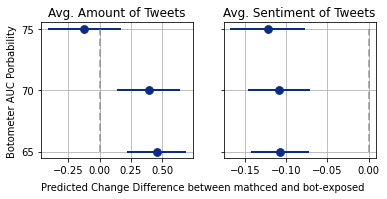

In [640]:
fig, axs = plt.subplots(1, 2, figsize=(6, 2.5
                                      ), sharey=True)



ax1=axs[0]
ax1.scatter(y=list(A_rel_diff2_astro.index), x=list(A_rel_diff2_astro['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax1.hlines(y=list(A_rel_diff2_astro.index), xmin=list(A_rel_diff2_astro['min']),
               xmax=list(A_rel_diff2_astro['max']), linewidth=2, color=bot_color,alpha=1)
ax1.grid()
ax1.set_title("Avg. Amount of Tweets")

ax2=axs[1]
ax2.scatter(y=list(S_rel_diff2_astro.index), x=list(S_rel_diff2_astro['ols_pred']), s=60, color=bot_color, label='bot exposed')

ax2.hlines(y=list(S_rel_diff2_astro.index), xmin=list(S_rel_diff2_astro['min']),
               xmax=list(S_rel_diff2_astro['max']), linewidth=2, color=bot_color,alpha=1)
ax2.grid()
ax2.set_title("Avg. Sentiment of Tweets")
ax1.vlines(x=0, ymin=-0.01, ymax=2.01,ls='dashed', lw=2,color="grey", alpha=0.6)
ax2.vlines(x=0, ymin=-0.01, ymax=2.01,ls='dashed', lw=2,color="grey", alpha=0.6)
#ax1.set_xlim(-.85,0.8)
#ax2.set_xlim(-.9,0.1)
ax1.set_ylabel("Botometer AUC Porbability")
fig.text(0.5, -0.05, "Predicted Change Difference between mathced and bot-exposed", ha='center')
plt.savefig("Predicted_change_diff_allcutoff.pdf")

In [468]:
#A_rel_diff[:1]

In [643]:
A_rel_diff2

,ols_pred,SE,min,max
cutoff,,,,
65,-0.069351,0.148,-0.359431,0.220729
70,-0.278072,0.162,-0.595592,0.039448
75,-0.078131,0.200,-0.470131,0.313869


In [1104]:
t=0.475

#A_rel_diff2=A_rel_diff2.reset_index()
A_rel_diff2['cutoff']=A_rel_diff2.index.astype(int)
A_rel_diff2['new_y']=[i-t for i in A_rel_diff2['cutoff']]

#S_rel_diff2=S_rel_diff2.reset_index()
S_rel_diff2['cutoff']=S_rel_diff2.index.astype(int)
S_rel_diff2['new_y']=[i-t for i in S_rel_diff2['cutoff']]


#A_rel_diff2_astro=A_rel_diff2_astro.reset_index()
A_rel_diff2_astro['cutoff']=A_rel_diff2_astro.index.astype(int)
A_rel_diff2_astro['new_y']=[i+t for i in A_rel_diff2_astro['cutoff']]

#S_rel_diff2_astro=S_rel_diff2_astro.reset_index()
S_rel_diff2_astro['cutoff']=S_rel_diff2_astro.index.astype(int)
S_rel_diff2_astro['new_y']=[i+t for i in S_rel_diff2_astro['cutoff']]

<ipython-input-1104-cffb3b1a8aa2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_rel_diff2['cutoff']=A_rel_diff2.index.astype(int)
<ipython-input-1104-cffb3b1a8aa2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A_rel_diff2['new_y']=[i-t for i in A_rel_diff2['cutoff']]
<ipython-input-1104-cffb3b1a8aa2>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [1101]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

<ipython-input-1102-753b84755595>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(["","65","70","75",""])


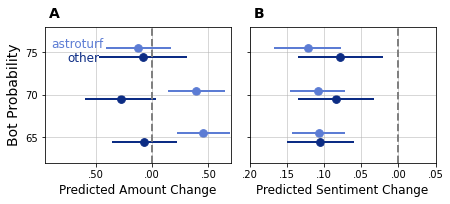

In [1102]:
# TWO CATEGORIES TOGETHER

fig, axs = plt.subplots(1, 2, figsize=(7, 2.5), 
                        gridspec_kw={"hspace":0.1, "wspace":0.1},
                        sharey=True)

astro_color="#5C7CD4"
def remove_leading_zero(x, pos):
    if x == 0:
        return '.00'
    elif x > 0:
        return '{:.2f}'.format(x).lstrip('0')
    else:
        return '-{:.2f}'.format(abs(x)).lstrip('0-')

# Apply custom formatter to x-axes

ax1=axs[0]
ax1.scatter(y=list(A_rel_diff2.new_y), x=list(A_rel_diff2['ols_pred']), s=60, color=bot_color, 
            label='astroturfs',alpha=1)

ax1.hlines(y=list(A_rel_diff2.new_y), xmin=list(A_rel_diff2['min']),
               xmax=list(A_rel_diff2['max']), linewidth=2, color=bot_color,alpha=1)

ax1.set_title("Amount", fontsize=14)

ax2=axs[1]
#ax.xaxis.set_major_formatter(FuncFormatter(ax2))

ax2.scatter(y=list(S_rel_diff2.new_y), x=list(S_rel_diff2['ols_pred']), s=60, color=bot_color, 
           alpha=1)

ax2.hlines(y=list(S_rel_diff2.new_y), xmin=list(S_rel_diff2['min']),
               xmax=list(S_rel_diff2['max']), linewidth=2, color=bot_color,alpha=1)



ax1.scatter(y=list(A_rel_diff2_astro.new_y), x=list(A_rel_diff2_astro['ols_pred']), s=60, color=astro_color, label='other bots')

ax1.hlines(y=list(A_rel_diff2_astro.new_y), xmin=list(A_rel_diff2_astro['min']),
               xmax=list(A_rel_diff2_astro['max']), linewidth=2, color=astro_color,alpha=1)


ax2.scatter(y=list(S_rel_diff2_astro.new_y), x=list(S_rel_diff2_astro['ols_pred']), s=60, color=astro_color, label='other bots')

ax2.hlines(y=list(S_rel_diff2_astro.new_y), xmin=list(S_rel_diff2_astro['min']),
               xmax=list(S_rel_diff2_astro['max']), linewidth=2, color=astro_color,alpha=1)

ax2.grid(linewidth=.5)
ax1.grid(linewidth=.5)
ax2.set_title("Sentiment", fontsize=14)
ax1.vlines(x=0, ymin=62, ymax=78,ls='dashed', lw=2,color="grey", alpha=1)
ax2.vlines(x=0, ymin=62, ymax=78,ls='dashed', lw=2,color="grey", alpha=1)
#ax1.set_xlim(-.85,0.8)
ax1.set_ylim(62,78)
ax2.set_ylim(62,78)
ax2.set_xlim(-.2,.05)
ax1.set_xlim(-.95,0.7)
ax1.set_ylabel("Bot Probability", fontsize=14)
ax1.set_yticklabels(["","65","70","75",""])

#ax1.text(x=-.75,y=75.5,s='other',fontsize=12, color=bot_color)
#ax1.text(x=-.89,y=73.9,s='astroturf',fontsize=12, color=astro_color)


ax1.text(x=-.75,y=73.9,s='other',fontsize=12, color=bot_color)
ax1.text(x=-.89,y=75.5,s='astroturf',fontsize=12, color=astro_color)

ax1.set_title("A", weight='bold', fontsize=14, position=(0.02, 1.),
                     horizontalalignment='left', verticalalignment='bottom')
ax2.set_title("B", weight='bold', fontsize=14, position=(0.02, 1.),    
              horizontalalignment='left', verticalalignment='bottom')

ax1.set_xlabel("Predicted Amount Change", fontsize=12)
ax2.set_xlabel("Predicted Sentiment Change", fontsize=12)


ax1.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero))
ax2.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero))

#fig.text(0.5, -0.05, "Predicted Change Difference between mathced and bot-exposed", fontsize=12,
#         ha='center')
#ax2.legend(loc='upper center', bbox_to_anchor=(1.3, 1))
plt.savefig("/Users/vorsi/Downloads/Predicted_change_diff_allcutoff_A_B.pdf", bbox_inches='tight')

In [648]:
pwd

'/Users/vorsi/Dropbox/bot and agenda-setting/codes and data/github_despoit/bot_cascade_paper/analysis'

<ipython-input-647-541ddba057d6>:60: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(["","65","70","75",""])


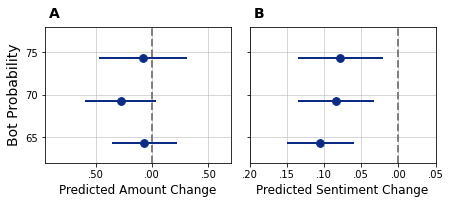

In [647]:
# TWO CATEGORIES TOGETHER

fig, axs = plt.subplots(1, 2, figsize=(7, 2.5), 
                        gridspec_kw={"hspace":0.1, "wspace":0.1},
                        sharey=True)

astro_color="#5C7CD4"
def remove_leading_zero(x, pos):
    if x == 0:
        return '.00'
    elif x > 0:
        return '{:.2f}'.format(x).lstrip('0')
    else:
        return '-{:.2f}'.format(abs(x)).lstrip('0-')

# Apply custom formatter to x-axes

ax1=axs[0]
ax1.scatter(y=list(A_rel_diff2.new_y), x=list(A_rel_diff2['ols_pred']), s=60, color=bot_color, 
            label='astroturfs',alpha=1)

ax1.hlines(y=list(A_rel_diff2.new_y), xmin=list(A_rel_diff2['min']),
               xmax=list(A_rel_diff2['max']), linewidth=2, color=bot_color,alpha=1)

ax1.set_title("Amount", fontsize=14)

ax2=axs[1]
#ax.xaxis.set_major_formatter(FuncFormatter(ax2))

ax2.scatter(y=list(S_rel_diff2.new_y), x=list(S_rel_diff2['ols_pred']), s=60, color=bot_color, 
           alpha=1)

ax2.hlines(y=list(S_rel_diff2.new_y), xmin=list(S_rel_diff2['min']),
               xmax=list(S_rel_diff2['max']), linewidth=2, color=bot_color,alpha=1)



#ax1.scatter(y=list(A_rel_diff2_astro.new_y), x=list(A_rel_diff2_astro['ols_pred']), s=60, color=astro_color, label='other bots')#

#ax1.hlines(y=list(A_rel_diff2_astro.new_y), xmin=list(A_rel_diff2_astro['min']),
#               xmax=list(A_rel_diff2_astro['max']), linewidth=2, color=astro_color,alpha=1)


#ax2.scatter(y=list(S_rel_diff2_astro.new_y), x=list(S_rel_diff2_astro['ols_pred']), s=60, color=astro_color, label='other bots')

#ax2.hlines(y=list(S_rel_diff2_astro.new_y), xmin=list(S_rel_diff2_astro['min']),
#               xmax=list(S_rel_diff2_astro['max']), linewidth=2, color=astro_color,alpha=1)

ax2.grid(linewidth=.5)
ax1.grid(linewidth=.5)
ax2.set_title("Sentiment", fontsize=14)
ax1.vlines(x=0, ymin=62, ymax=78,ls='dashed', lw=2,color="grey", alpha=1)
ax2.vlines(x=0, ymin=62, ymax=78,ls='dashed', lw=2,color="grey", alpha=1)
#ax1.set_xlim(-.85,0.8)
ax1.set_ylim(62,78)
ax2.set_ylim(62,78)
ax2.set_xlim(-.2,.05)
ax1.set_xlim(-.95,0.7)
ax1.set_ylabel("Bot Probability", fontsize=14)
ax1.set_yticklabels(["","65","70","75",""])

#ax1.text(x=-.75,y=75.5,s='other',fontsize=12, color=bot_color)
#ax1.text(x=-.89,y=73.9,s='astroturf',fontsize=12, color=astro_color)


#ax1.text(x=-.75,y=73.9,s='other',fontsize=12, color=bot_color)
#ax1.text(x=-.89,y=75.5,s='astroturf',fontsize=12, color=astro_color)

ax1.set_title("A", weight='bold', fontsize=14, position=(0.02, 1.),
                     horizontalalignment='left', verticalalignment='bottom')
ax2.set_title("B", weight='bold', fontsize=14, position=(0.02, 1.),    
              horizontalalignment='left', verticalalignment='bottom')

ax1.set_xlabel("Predicted Amount Change", fontsize=12)
ax2.set_xlabel("Predicted Sentiment Change", fontsize=12)


ax1.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero))
ax2.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero))

#fig.text(0.5, -0.05, "Predicted Change Difference between mathced and bot-exposed", fontsize=12,
#         ha='center')
#ax2.legend(loc='upper center', bbox_to_anchor=(1.3, 1))
plt.savefig("/Users/vorsi/Downloads/Predicted_change_diff_allcutoff_A_B_NO_ASTRO.pdf", bbox_inches='tight')

In [624]:
pwd

'/Users/vorsi/Dropbox/bot and agenda-setting/codes and data/github_despoit/bot_cascade_paper/analysis'

# OPINION PREDICTIONS

In [785]:
p_in="/Users/vorsi/Dropbox/bot and agenda-setting/codes and data/orsi/PREDS/"
preds=sorted([i for i in os.listdir(p_in) if 'opinion' in i])

In [786]:
preds

['PRED_amount_65_all_opinion_con.csv',
 'PRED_amount_65_all_opinion_neutral.csv',
 'PRED_amount_65_all_opinion_pro.csv',
 'PRED_amount_70_all_opinion_con.csv',
 'PRED_amount_70_all_opinion_neutral.csv',
 'PRED_amount_70_all_opinion_pro.csv',
 'PRED_amount_75_all_opinion_con.csv',
 'PRED_amount_75_all_opinion_neutral.csv',
 'PRED_amount_75_all_opinion_pro.csv',
 'PRED_senti_65_all_opinion_con.csv',
 'PRED_senti_65_all_opinion_neutral.csv',
 'PRED_senti_65_all_opinion_pro.csv',
 'PRED_senti_70_all_opinion_con.csv',
 'PRED_senti_70_all_opinion_neutral.csv',
 'PRED_senti_70_all_opinion_pro.csv',
 'PRED_senti_75_all_opinion_con.csv',
 'PRED_senti_75_all_opinion_neutral.csv',
 'PRED_senti_75_all_opinion_pro.csv']

In [787]:
dfs_opinion=[]
for p in preds:
    df=pd.read_csv(p_in+p)
    if 'con' in p:
        df['bot_cat']='con'
    elif 'neutral' in p:
        df['bot_cat']='neutral'
    elif 'pro' in p:
        df['bot_cat']='pro' 
    if "amount" in p:
        df['type']='amount'
    elif "senti" in p:
         df['type']='senti'
    if '65' in p:
        df['cutoff']="65"
    elif "70" in p:
        df['cutoff']="70"
    elif "75" in p:
        df['cutoff']="75"
    dfs_opinion.append(df)
all_pred_opinion=pd.concat(dfs_opinion).drop_duplicates()

In [788]:
all_pred_opinion[all_pred_opinion['bot_cat']=='con']

,bot_interaction,after,interaction_senti,user_interaction_opinion,retweet_count_original,like_count_interaction,astroturf_score_bot,burstiness,topic,ols_pred,ols_low,ols_up,bot_cat,type,cutoff
0,0,0,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,-1.252071,-1.616042,-0.888100,con,amount,65
1,1,0,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,0.654839,0.430924,0.878753,con,amount,65
2,0,1,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,-1.704178,-2.100744,-1.307612,con,amount,65
3,1,1,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,0.370629,0.144838,0.596420,con,amount,65
0,0,0,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,-0.845429,-1.232209,-0.458650,con,amount,70
1,1,0,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,0.480696,0.260057,0.701335,con,amount,70
2,0,1,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,-1.252174,-1.672583,-0.831765,con,amount,70
3,1,1,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,0.229653,0.006535,0.452771,con,amount,70
0,0,0,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,-1.345375,-1.876542,-0.814208,con,amount,75
1,1,0,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,-0.089092,-0.354659,0.176475,con,amount,75


In [789]:
#PRO
all_pred=all_pred_opinion
pro_before_human_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='pro')]

pro_after_human_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='pro')]


pro_before_bot_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='pro')]


pro_after_bot_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='pro')]

#CON
con_before_human_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='con')]

con_after_human_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='con')]


con_before_bot_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='con')]


con_after_bot_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='con')]


#neutral
neutral_before_human_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='neutral')]

neutral_after_human_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='neutral')]


neutral_before_bot_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='neutral')]


neutral_after_bot_amount=all_pred[(all_pred["type"]=='amount') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='neutral')]

In [790]:
#PRO
pro_before_human_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='pro')]

pro_after_human_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='pro')]


pro_before_bot_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='pro')]


pro_after_bot_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='pro')]

#CON
con_before_human_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='con')]

con_after_human_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='con')]


con_before_bot_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='con')]


con_after_bot_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='con')]


#neutral
neutral_before_human_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='neutral')]

neutral_after_human_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==0) & 
                         (all_pred['bot_cat']=='neutral')]


neutral_before_bot_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==0) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='neutral')]


neutral_after_bot_senti=all_pred[(all_pred["type"]=='senti') & 
                          (all_pred["after"]==1) & 
                          (all_pred["bot_interaction"]==1) & 
                         (all_pred['bot_cat']=='neutral')]

In [791]:
#bot_human_amount_before_diff_pro=pro_before_bot_amount['ols_pred'].reset_index()-pro_before_human_amount['ols_pred'].reset_index()
#bot_human_amount_after_diff_pro=pro_after_bot_amount['ols_pred'].reset_index()-pro_after_human_amount['ols_pred'].reset_index()
human_amount_diff_pro=pro_before_human_amount.set_index('cutoff')[['ols_pred']]-pro_after_human_amount.set_index('cutoff')[['ols_pred']]
bot_amount_diff_pro=pro_before_bot_amount.set_index('cutoff')[['ols_pred']]-pro_after_bot_amount.set_index('cutoff')[['ols_pred']]
A_rel_diff_pro=human_amount_diff_pro-bot_amount_diff_pro


human_senti_diff_pro=pro_before_human_senti.set_index('cutoff')[['ols_pred']]-pro_after_human_senti.set_index('cutoff')[['ols_pred']]
bot_senti_diff_pro=pro_before_bot_senti.set_index('cutoff')[['ols_pred']]-pro_after_bot_senti.set_index('cutoff')[['ols_pred']]
S_rel_diff_pro=human_senti_diff_pro-bot_senti_diff_pro


In [792]:
human_amount_diff_con=con_before_human_amount.set_index('cutoff')[['ols_pred']]-con_after_human_amount.set_index('cutoff')[['ols_pred']]
bot_amount_diff_con=con_before_bot_amount.set_index('cutoff')[['ols_pred']]-con_after_bot_amount.set_index('cutoff')[['ols_pred']]
A_rel_diff_con=human_amount_diff_con-bot_amount_diff_con


human_senti_diff_con=con_before_human_senti.set_index('cutoff')[['ols_pred']]-con_after_human_senti.set_index('cutoff')[['ols_pred']]
bot_senti_diff_con=con_before_bot_senti.set_index('cutoff')[['ols_pred']]-con_after_bot_senti.set_index('cutoff')[['ols_pred']]
S_rel_diff_con=human_senti_diff_con-bot_senti_diff_con


In [793]:
con_before_human_amount

,bot_interaction,after,interaction_senti,user_interaction_opinion,retweet_count_original,like_count_interaction,astroturf_score_bot,burstiness,topic,ols_pred,ols_low,ols_up,bot_cat,type,cutoff
0,0,0,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,-1.252071,-1.616042,-0.888100,con,amount,65
0,0,0,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,-0.845429,-1.232209,-0.458650,con,amount,70
0,0,0,-0.010299,-0.33449,24.921569,1.72549,2.137255,0.151381,1,-1.345375,-1.876542,-0.814208,con,amount,75


In [794]:
human_amount_diff_neutral=neutral_before_human_amount.set_index('cutoff')[['ols_pred']]-neutral_after_human_amount.set_index('cutoff')[['ols_pred']]
bot_amount_diff_neutral=neutral_before_bot_amount.set_index('cutoff')[['ols_pred']]-neutral_after_bot_amount.set_index('cutoff')[['ols_pred']]
A_rel_diff_neutral=human_amount_diff_neutral-bot_amount_diff_neutral


human_senti_diff_neutral=neutral_before_human_senti.set_index('cutoff')[['ols_pred']]-neutral_after_human_senti.set_index('cutoff')[['ols_pred']]
bot_senti_diff_neutral=neutral_before_bot_senti.set_index('cutoff')[['ols_pred']]-neutral_after_bot_senti.set_index('cutoff')[['ols_pred']]
S_rel_diff_neutral=human_senti_diff_neutral-bot_senti_diff_neutral


In [798]:
se_amount_pro= [0.111,0.120,0.139]    
se_senti_pro=[0.018,0.019,0.023]
A_rel_diff_pro['SE']=se_amount_pro
S_rel_diff_pro['SE']=se_senti_pro
A_rel_diff_pro['min']=A_rel_diff_pro['ols_pred']-1.96*A_rel_diff_pro['SE']
A_rel_diff_pro['max']=A_rel_diff_pro['ols_pred']+1.96*A_rel_diff_pro['SE']
S_rel_diff_pro['min']=S_rel_diff_pro['ols_pred']-1.96*S_rel_diff_pro['SE']
S_rel_diff_pro['max']=S_rel_diff_pro['ols_pred']+1.96*S_rel_diff_pro['SE']


se_amount_con=[0.234,0.252,0.311]    
se_senti_con=[0.030,0.034,0.043]
A_rel_diff_con['SE']=se_amount_con
S_rel_diff_con['SE']=se_senti_con
A_rel_diff_con['min']=A_rel_diff_con['ols_pred']-1.96*A_rel_diff_con['SE']
A_rel_diff_con['max']=A_rel_diff_con['ols_pred']+1.96*A_rel_diff_con['SE']
S_rel_diff_con['min']=S_rel_diff_con['ols_pred']-1.96*S_rel_diff_con['SE']
S_rel_diff_con['max']=S_rel_diff_con['ols_pred']+1.96*S_rel_diff_con['SE']


se_amount_neutral=[0.310,0.309,0.427]   
se_senti_neutral=[0.033,0.036,0.041]
A_rel_diff_neutral['SE']=se_amount_neutral
S_rel_diff_neutral['SE']=se_senti_neutral
A_rel_diff_neutral['min']=A_rel_diff_neutral['ols_pred']-1.96*A_rel_diff_neutral['SE']
A_rel_diff_neutral['max']=A_rel_diff_neutral['ols_pred']+1.96*A_rel_diff_neutral['SE']
S_rel_diff_neutral['min']=S_rel_diff_neutral['ols_pred']-1.96*S_rel_diff_neutral['SE']
S_rel_diff_neutral['max']=S_rel_diff_neutral['ols_pred']+1.96*S_rel_diff_neutral['SE']

In [1092]:
t=0.7

#A_rel_diff2=A_rel_diff2.reset_index()
A_rel_diff_pro['cutoff']=A_rel_diff_pro.index.astype(int)
A_rel_diff_pro['new_y']=[i+t*1.3 for i in A_rel_diff_pro['cutoff']]

#S_rel_diff2=S_rel_diff2.reset_index()
S_rel_diff_pro['cutoff']=S_rel_diff_pro.index.astype(int)
S_rel_diff_pro['new_y']=[i+t*1.3 for i in S_rel_diff_pro['cutoff']]


#A_rel_diff2_astro=A_rel_diff2_astro.reset_index()
A_rel_diff_neutral['cutoff']=A_rel_diff_neutral.index.astype(int)
A_rel_diff_neutral['new_y']=[i for i in A_rel_diff_neutral['cutoff']]
#S_rel_diff2_astro=S_rel_diff2_astro.reset_index()
S_rel_diff_neutral['cutoff']=S_rel_diff_neutral.index.astype(int)
S_rel_diff_neutral['new_y']=[i for i in S_rel_diff_neutral['cutoff']]

A_rel_diff_con['cutoff']=A_rel_diff_con.index.astype(int)
A_rel_diff_con['new_y']=[i-t*1.3 for i in A_rel_diff_con['cutoff']]
S_rel_diff_con['cutoff']=S_rel_diff_neutral.index.astype(int)
S_rel_diff_con['new_y']=[i-t*1.3 for i in S_rel_diff_con['cutoff']]

<ipython-input-1093-57007054c0e3>:88: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(["","65","70","75",""])


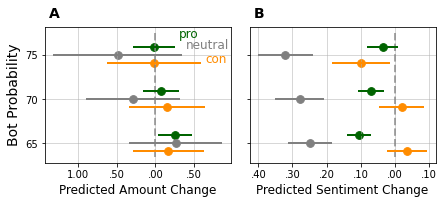

In [1093]:
# TWO CATEGORIES TOGETHER

fig, axs = plt.subplots(1, 2, figsize=(7, 2.5), 
                        gridspec_kw={"hspace":0.1, "wspace":0.1},
                        sharey=True)

pro="darkgreen"
con="darkorange"
neutral='grey'

def remove_leading_zero(x, pos):
    if x == 0:
        return '.00'
    elif x > 0:
        return '{:.2f}'.format(x).lstrip('0')
    else:
        return '-{:.2f}'.format(abs(x)).lstrip('0-')

# Apply custom formatter to x-axes

ax1=axs[0]
ax1.vlines(x=0, ymin=63.5, ymax=77.5,ls='dashed', lw=2,color="grey", alpha=.7)
ax1.scatter(y=list(A_rel_diff_pro.new_y), x=list(A_rel_diff_pro['ols_pred']), s=60, color=pro, 
            label='pro',alpha=1)

ax1.hlines(y=list(A_rel_diff_pro.new_y), xmin=list(A_rel_diff_pro['min']),
               xmax=list(A_rel_diff_pro['max']), linewidth=2, color=pro,alpha=1)

ax1.set_title("Amount", fontsize=14)

ax2=axs[1]
ax2.vlines(x=0, ymin=63.5, ymax=77.5,ls='dashed', lw=2,color="grey", alpha=.7)

#ax.xaxis.set_major_formatter(FuncFormatter(ax2))

ax2.scatter(y=list(S_rel_diff_pro.new_y), x=list(S_rel_diff_pro['ols_pred']), s=60, color=pro, 
           alpha=1)

ax2.hlines(y=list(S_rel_diff_pro.new_y), xmin=list(S_rel_diff_pro['min']),
               xmax=list(S_rel_diff_pro['max']), linewidth=2, color=pro,alpha=1)



ax1.scatter(y=list(A_rel_diff_neutral.new_y), x=list(A_rel_diff_neutral['ols_pred']), s=60, color=neutral, 
            label='neutral')

ax1.hlines(y=list(A_rel_diff_neutral.new_y), xmin=list(A_rel_diff_neutral['min']),
               xmax=list(A_rel_diff_neutral['max']), linewidth=2, color=neutral,alpha=1)



ax2.scatter(y=list(S_rel_diff_neutral.new_y), x=list(S_rel_diff_neutral['ols_pred']), s=60, 
            color=neutral, label='neutral')

ax2.hlines(y=list(S_rel_diff_neutral.new_y), xmin=list(S_rel_diff_neutral['min']),
               xmax=list(S_rel_diff_neutral['max']), linewidth=2, color=neutral,alpha=1)


#NEUTRAL
ax1.scatter(y=list(A_rel_diff_con.new_y), x=list(A_rel_diff_con['ols_pred']), 
            s=60, color=con, 
            label='con')

ax1.hlines(y=list(A_rel_diff_con.new_y), xmin=list(A_rel_diff_con['min']),
               xmax=list(A_rel_diff_con['max']), linewidth=2, color=con,alpha=1)


ax2.scatter(y=list(S_rel_diff_con.new_y), x=list(S_rel_diff_con['ols_pred']), s=60, 
            color=con, label='other bots')

ax2.hlines(y=list(S_rel_diff_con.new_y), xmin=list(S_rel_diff_con['min']),
               xmax=list(S_rel_diff_con['max']), linewidth=2, color=con,alpha=1)





ax2.grid(linewidth=.5)
ax1.grid(linewidth=.5)
ax2.set_title("Sentiment", fontsize=14)

#ax1.set_xlim(-.85,0.8)
#ax1.set_ylim(62,78)
#ax2.set_ylim(62,78)
#ax2.set_xlim(-.2,.05)
#ax1.set_xlim(-.95,0.7)
ax1.set_ylabel("Bot Probability", fontsize=14)
ax1.set_yticklabels(["","65","70","75",""])

#ax1.text(x=-.75,y=75.5,s='other',fontsize=12, color=bot_color)
#ax1.text(x=-.89,y=73.9,s='astroturf',fontsize=12, color=astro_color)


ax1.text(x=.3,y=77.,s='pro',fontsize=12, color=pro)
ax1.text(x=.645,y=74.1,s='con',fontsize=12, color=con)
ax1.text(x=.4,y=75.7,s='neutral',fontsize=12, color=neutral)

ax1.set_title("A", weight='bold', fontsize=14, position=(0.02, 1.),
                     horizontalalignment='left', verticalalignment='bottom')
ax2.set_title("B", weight='bold', fontsize=14, position=(0.02, 1.),    
              horizontalalignment='left', verticalalignment='bottom')

ax1.set_xlabel("Predicted Amount Change", fontsize=12)
ax2.set_xlabel("Predicted Sentiment Change", fontsize=12)


ax1.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero))
ax2.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero))

#fig.text(0.5, -0.05, "Predicted Change Difference between mathced and bot-exposed", fontsize=12,
#         ha='center')
#ax2.legend(loc='upper center', bbox_to_anchor=(1.3, 1))
plt.savefig("/Users/vorsi/Downloads/Predicted_change_diff__pro_con_neutral_allcutoff_A_B.pdf", bbox_inches='tight')

# JOINED PLOT

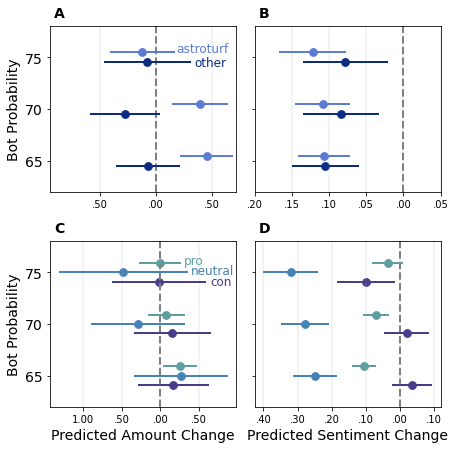

In [1107]:
# TWO CATEGORIES TOGETHER

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(7, 7), 
                        gridspec_kw={"hspace":0.3, "wspace":.1},
                        sharey=True)

astro_color="#5C7CD4"
def remove_leading_zero(x, pos):
    if x == 0:
        return '.00'
    elif x > 0:
        return '{:.2f}'.format(x).lstrip('0')
    else:
        return '-{:.2f}'.format(abs(x)).lstrip('0-')

# Apply custom formatter to x-axes

#ax1=axs[0]

ax1.vlines(x=0, ymin=62, ymax=78,ls='dashed', lw=2,color="grey", alpha=1)
ax2.vlines(x=0, ymin=62, ymax=78,ls='dashed', lw=2,color="grey", alpha=1)
ax3.vlines(x=0, ymin=62, ymax=78,ls='dashed', lw=2,color="grey", alpha=1)
ax4.vlines(x=0, ymin=62, ymax=78,ls='dashed', lw=2,color="grey", alpha=1)

ax1.scatter(y=list(A_rel_diff2.new_y), x=list(A_rel_diff2['ols_pred']), s=60, color=bot_color, 
            label='astroturfs',alpha=1)

ax1.hlines(y=list(A_rel_diff2.new_y), xmin=list(A_rel_diff2['min']),
               xmax=list(A_rel_diff2['max']), linewidth=2, color=bot_color,alpha=1)

#ax1.set_title("Amount", fontsize=14)

#ax2=axs[1]
#ax.xaxis.set_major_formatter(FuncFormatter(ax2))

ax2.scatter(y=list(S_rel_diff2.new_y), x=list(S_rel_diff2['ols_pred']), s=60, color=bot_color, 
           alpha=1)

ax2.hlines(y=list(S_rel_diff2.new_y), xmin=list(S_rel_diff2['min']),
               xmax=list(S_rel_diff2['max']), linewidth=2, color=bot_color,alpha=1)



ax1.scatter(y=list(A_rel_diff2_astro.new_y), x=list(A_rel_diff2_astro['ols_pred']), s=60, color=astro_color, label='other bots')

ax1.hlines(y=list(A_rel_diff2_astro.new_y), xmin=list(A_rel_diff2_astro['min']),
               xmax=list(A_rel_diff2_astro['max']), linewidth=2, color=astro_color,alpha=1)


ax2.scatter(y=list(S_rel_diff2_astro.new_y), x=list(S_rel_diff2_astro['ols_pred']), s=60, color=astro_color, label='other bots')

ax2.hlines(y=list(S_rel_diff2_astro.new_y), xmin=list(S_rel_diff2_astro['min']),
               xmax=list(S_rel_diff2_astro['max']), linewidth=2, color=astro_color,alpha=1)

#ax2.grid(linewidth=.5)
#ax1.grid(linewidth=.5)
ax2.set_title("Sentiment", fontsize=14)
#ax1.vlines(x=0, ymin=62, ymax=78,ls='dashed', lw=2,color="grey", alpha=1)
#ax2.vlines(x=0, ymin=62, ymax=78,ls='dashed', lw=2,color="grey", alpha=1)
#ax1.set_xlim(-.85,0.8)
ax1.set_ylim(62,78)
ax2.set_ylim(62,78)
ax2.set_xlim(-.2,.05)
ax1.set_xlim(-.95,0.72)
ax1.set_ylabel("Bot Probability", fontsize=14)
#ax1.set_yticklabels(['','65','','','70','','','75',''],fontsize=14)

#ax1.text(x=-.75,y=75.5,s='other',fontsize=12, color=bot_color)
#ax1.text(x=-.89,y=73.9,s='astroturf',fontsize=12, color=astro_color)


ax1.text(x=.35,y=74.15,s='other',fontsize=12, color=bot_color)
ax1.text(x=.18,y=75.5,s='astroturf',fontsize=12, color=astro_color)

ax1.set_title("A", weight='bold', fontsize=14, position=(0.02, 1.),
                     horizontalalignment='left', verticalalignment='bottom')
ax2.set_title("B", weight='bold', fontsize=14, position=(0.02, 1.),    
              horizontalalignment='left', verticalalignment='bottom')

#ax1.set_xlabel("Predicted Amount Change", fontsize=12)
#ax2.set_xlabel("Predicted Sentiment Change", fontsize=12)


ax1.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero))
ax2.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero))

# TWO CATEGORIES TOGETHER

#fig, axs = plt.subplots(1, 2, figsize=(7, 2.5), 
#                        gridspec_kw={"hspace":0.1, "wspace":0.1},
#                        sharey=True)

pro="cadetblue"
neutral="steelblue"
con='darkslateblue'


# Apply custom formatter to x-axes


#ax3.vlines(x=0, ymin=63.5, ymax=77.5,ls='dashed', lw=2,color="grey", alpha=.7)
ax3.scatter(y=list(A_rel_diff_pro.new_y), x=list(A_rel_diff_pro['ols_pred']), s=60, color=pro, 
            label='pro',alpha=1)

ax3.hlines(y=list(A_rel_diff_pro.new_y), xmin=list(A_rel_diff_pro['min']),
               xmax=list(A_rel_diff_pro['max']), linewidth=2, color=pro,alpha=1)

#ax1.set_title("Amount", fontsize=14)

#ax2=axs[1]
#ax4.vlines(x=0, ymin=63.5, ymax=77.5,ls='dashed', lw=2,color="grey", alpha=.7)

#ax.xaxis.set_major_formatter(FuncFormatter(ax2))

ax4.scatter(y=list(S_rel_diff_pro.new_y), x=list(S_rel_diff_pro['ols_pred']), s=60, color=pro, 
           alpha=1)

ax4.hlines(y=list(S_rel_diff_pro.new_y), xmin=list(S_rel_diff_pro['min']),
               xmax=list(S_rel_diff_pro['max']), linewidth=2, color=pro,alpha=1)



ax3.scatter(y=list(A_rel_diff_neutral.new_y), x=list(A_rel_diff_neutral['ols_pred']), s=60, color=neutral, 
            label='neutral')

ax3.hlines(y=list(A_rel_diff_neutral.new_y), xmin=list(A_rel_diff_neutral['min']),
               xmax=list(A_rel_diff_neutral['max']), linewidth=2, color=neutral,alpha=1)



ax4.scatter(y=list(S_rel_diff_neutral.new_y), x=list(S_rel_diff_neutral['ols_pred']), s=60, 
            color=neutral, label='neutral')

ax4.hlines(y=list(S_rel_diff_neutral.new_y), xmin=list(S_rel_diff_neutral['min']),
               xmax=list(S_rel_diff_neutral['max']), linewidth=2, color=neutral,alpha=1)


#NEUTRAL
ax3.scatter(y=list(A_rel_diff_con.new_y), x=list(A_rel_diff_con['ols_pred']), 
            s=60, color=con, 
            label='con')

ax3.hlines(y=list(A_rel_diff_con.new_y), xmin=list(A_rel_diff_con['min']),
               xmax=list(A_rel_diff_con['max']), linewidth=2, color=con,alpha=1)


ax4.scatter(y=list(S_rel_diff_con.new_y), x=list(S_rel_diff_con['ols_pred']), s=60, 
            color=con, label='other bots')

ax4.hlines(y=list(S_rel_diff_con.new_y), xmin=list(S_rel_diff_con['min']),
               xmax=list(S_rel_diff_con['max']), linewidth=2, color=con,alpha=1)




ax3.xaxis.grid(linewidth=.3)
ax4.xaxis.grid(linewidth=.3)
ax1.xaxis.grid(linewidth=.3)
ax2.xaxis.grid(linewidth=.3)
#ax3.grid(linewidth=.5)
#ax4.grid(linewidth=.5)
#ax3.set_title("Sentiment", fontsize=14)

#ax1.set_xlim(-.85,0.8)
#ax1.set_ylim(62,78)
#ax2.set_ylim(62,78)
#ax2.set_xlim(-.2,.05)
#ax1.set_xlim(-.95,0.7)
ax3.set_ylabel("Bot Probability", fontsize=14)

ax1.set_yticks( ticks=[65,70,75],           labels=["65","70","75"], fontsize=14)
ax3.set_yticks( ticks=[65,70,75],           labels=["65","70","75"], fontsize=14)

#axPres.yaxis.set_label_coords(-0.1, 1.02)

#ax3.set_yticklabels(['','65','','','70','','','75','',""],fontsize=14)

#ax1.text(x=-.75,y=75.5,s='other',fontsize=12, color=bot_color)
#ax1.text(x=-.89,y=73.9,s='astroturf',fontsize=12, color=astro_color)


ax3.text(x=.3,y=75.8,s='pro',fontsize=12, color=pro)
ax3.text(x=.645,y=73.8,s='con',fontsize=12, color=con)
ax3.text(x=.4,y=74.8,s='neutral',fontsize=12, color=neutral)

ax3.set_title("C", weight='bold', fontsize=14, position=(0.02, 1.),
                     horizontalalignment='left', verticalalignment='bottom')
ax4.set_title("D", weight='bold', fontsize=14, position=(0.02, 1.),    
              horizontalalignment='left', verticalalignment='bottom')

ax3.set_xlabel("Predicted Amount Change", fontsize=14)
ax4.set_xlabel("Predicted Sentiment Change", fontsize=14)


ax3.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero))
ax4.xaxis.set_major_formatter(FuncFormatter(remove_leading_zero))

#fig.text(0.5, -0.05, "Predicted Change Difference between mathced and bot-exposed", fontsize=12,
#         ha='center')
#ax2.legend(loc='upper center', bbox_to_anchor=(1.3, 1))
plt.savefig("/Users/vorsi/Downloads/Predicted_change_diff_astro_and_pro_con_neutral_allcutoff_square.pdf", bbox_inches='tight')

In [1082]:
astro_color

'#5C7CD4'

In [1031]:
bot_color

'#0C2C84'

# OPINION DATA

In [859]:
p_in2='/Users/vorsi/Dropbox/bot and agenda-setting/orsi/bot_text/'

In [892]:
#! cd /Users/vorsi/Dropbox/bot and agenda-setting/orsi/bot_text/

In [860]:
matched=pd.read_csv(p_in2+"grouped_matched_with_opinion.csv")
bot_exposed=pd.read_csv(p_in2+"grouped_sample_with_opinion.csv")

In [861]:
bot_days_data_filled=pd.read_csv(p_in2+"bot_days_data_with_opinion_filled_0306.csv")

In [862]:
def create_cat_user_interaction(row):
    if row['user_interaction_opinion']<0:
        return 'negative'
    elif row['user_interaction_opinion']>0:
        return 'positive'
    else:
        return 'neutral'

In [863]:
bot_days_data_filled['user_interaction_opinion_cat']=bot_days_data_filled.apply(create_cat_user_interaction,1)

In [1151]:
def create_cat_before_opinion(row):
    if row['before_opinion']<0:
        return 'negative'
    elif row['before_opinion']>0:
        return 'positive'
    elif row['before_opinion']==0:
        return 'neutral'
bot_days_data_filled['before_opinion_cat']=bot_days_data_filled.apply(create_cat_before_opinion,1)

In [1154]:
def create_cat_after_opinion(row):
    if row['after_opinion']<0:
        return 'negative'
    elif row['after_opinion']>0:
        return 'positive'
    elif row['after_opinion']==0:
        return 'neutral'
bot_days_data_filled['after_opinion_cat']=bot_days_data_filled.apply(create_cat_after_opinion,1)

In [1155]:
bot_days_data_filled[(bot_days_data_filled['bot_interaction']==1)][['before_opinion','after_opinion']].corr()

,before_opinion,after_opinion
before_opinion,1.0000,0.6828
after_opinion,0.6828,1.0000


In [1156]:
bot_days_data_filled[(bot_days_data_filled['bot_interaction']!=1)][['before_opinion','after_opinion']].corr()

,before_opinion,after_opinion
before_opinion,1.000000,0.607555
after_opinion,0.607555,1.000000


In [1157]:
len(set(bot_days_data_filled[(bot_days_data_filled['before_opinion_cat']!=bot_days_data_filled['after_opinion_cat']) &
                            (bot_days_data_filled['bot_interaction']==1)]['author_id_']))

62

In [1170]:
bot_days_data_filled.drop_duplicates('author_id_')['before_opinion_cat'].value_counts(normalize=True)

before_opinion_cat
positive    0.518672
neutral     0.269710
negative    0.211618
Name: proportion, dtype: float64

In [1159]:
bot_exp=bot_days_data_filled[bot_days_data_filled['bot_interaction']==1].drop_duplicates('author_id_')
matched=bot_days_data_filled[bot_days_data_filled['bot_interaction']!=1].drop_duplicates('author_id_')

In [1165]:
bot_exp['before_opinion_cat'].value_counts(normalize=True)

before_opinion_cat
positive    0.445545
neutral     0.297030
negative    0.257426
Name: proportion, dtype: float64

In [1167]:
matched['before_opinion_cat'].value_counts(normalize=True)

before_opinion_cat
positive    0.641304
neutral     0.228261
negative    0.130435
Name: proportion, dtype: float64

In [1168]:
matched['after_opinion_cat'].value_counts(normalize=True)

after_opinion_cat
positive    0.565217
neutral     0.304348
negative    0.130435
Name: proportion, dtype: float64

In [1166]:
bot_exp['after_opinion_cat'].value_counts(normalize=True)

after_opinion_cat
positive    0.419142
neutral     0.343234
negative    0.237624
Name: proportion, dtype: float64

In [1163]:
pd.crosstab(bot_exp['before_opinion_cat'],bot_exp['after_opinion_cat'], normalize=True, margins=True)

after_opinion_cat,negative,neutral,positive,All
before_opinion_cat,,,,
negative,0.188119,0.036304,0.033003,0.257426
neutral,0.009901,0.254125,0.033003,0.297030
positive,0.039604,0.052805,0.353135,0.445545
All,0.237624,0.343234,0.419142,1.000000


In [1130]:
len(set(bot_days_data_filled[bot_days_data_filled['bot_interaction']!=1]['author_id_']))

184

In [1128]:
62/303

0.20462046204620463

In [1131]:
37/184

0.20108695652173914

In [1129]:
len(set(bot_days_data_filled[(bot_days_data_filled['before_opinion_cat']!=bot_days_data_filled['after_opinion_cat']) &
                            (bot_days_data_filled['bot_interaction']==0)]['author_id_']))

37

In [ ]:
len(set(bot_days_data_filled[(bot_days_data_filled['before_opinion_cat']!=bot_days_data_filled['after_opinion_cat']) &
                            (bot_days_data_filled['bot_interaction']==0)]['author_id_']))

In [1120]:
bot_days_data_filled[bot_days_data_filled['bot_interaction']==1].drop_duplicates(subset=['author_id_'])['before_opinion']

0        1.0
61       0.0
122      0.5
183      1.0
244     -0.5
        ... 
18178   -1.0
18239    0.0
18300   -0.5
18361   -0.5
18422    0.5
Name: before_opinion, Length: 303, dtype: float64

In [1124]:
from scipy.stats import mannwhitneyu 

before_bot=list(bot_days_data_filled[bot_days_data_filled['bot_interaction']==1].drop_duplicates(subset=['author_id_'])['before_opinion'])
after_bot=list(bot_days_data_filled[bot_days_data_filled['bot_interaction']==1].drop_duplicates(subset=['author_id_'])['after_opinion'])
  
# perform mann whitney test 
stat, p_value = mannwhitneyu(before_bot, after_bot) 
print('Statistics=%.2f, p=%.2f' % (stat, p_value)) 
# Level of significance 
alpha = 0.05
# conclusion 
if p_value < alpha: 
    print('Reject Null Hypothesis (Significant difference between two samples)') 
else: 
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=45536.00, p=0.86
Do not Reject Null Hypothesis (No significant difference between two samples)


In [1125]:
before_bot=list(bot_days_data_filled[bot_days_data_filled['bot_interaction']==0].drop_duplicates(subset=['author_id_'])['before_opinion'])
after_bot=list(bot_days_data_filled[bot_days_data_filled['bot_interaction']==0].drop_duplicates(subset=['author_id_'])['after_opinion'])
  
# perform mann whitney test 
stat, p_value = mannwhitneyu(before_bot, after_bot) 
print('Statistics=%.2f, p=%.2f' % (stat, p_value)) 
# Level of significance 
alpha = 0.05
# conclusion 
if p_value < alpha: 
    print('Reject Null Hypothesis (Significant difference between two samples)') 
else: 
    print('Do not Reject Null Hypothesis (No significant difference between two samples)')

Statistics=17961.50, p=0.29
Do not Reject Null Hypothesis (No significant difference between two samples)


In [867]:
135/(135+78+90)

0.44554455445544555

In [742]:
78/(135+78+90)

0.25742574257425743

In [743]:
90/(135+78+90)

0.297029702970297

In [868]:
bot_days_data_filled['opinion_difference']=bot_days_data_filled['before_opinion']-bot_days_data_filled['after_opinion']

In [1149]:
bot_days_data_filled['before_opinion_cat'].value_counts()

before_opinion_cat
positive    15433
neutral      8052
negative     6222
Name: count, dtype: int64

In [870]:
bot_days_data_filled[['user_interaction_opinion', 'interaction_senti']].corr()

,user_interaction_opinion,interaction_senti
user_interaction_opinion,1.000000,0.203919
interaction_senti,0.203919,1.000000


In [1144]:
def opinion_flip_(row):
    if row['before_opinion']<0 and row['after_opinion']>0:
        return 1
    elif row['before_opinion']>0 and row['after_opinion']<0:
        return 1
    else:
        return 0

bot_days_data_filled['opinion_flip']=bot_days_data_filled.apply(opinion_flip_,1)

In [1145]:
def opinion_norm_(row):
    if row['before_opinion']<0 and row['after_opinion']==0:
        return 1
    elif row['before_opinion']>0 and row['after_opinion']==0:
        return 1
    else:
        return 0

bot_days_data_filled['opinion_neutralization']=bot_days_data_filled.apply(opinion_norm_,1)

In [1146]:
len(set(bot_days_data_filled[(bot_days_data_filled['bot_interaction']==1) &
    (bot_days_data_filled['opinion_neutralization']==1)]['author_id_']))

27

In [1147]:
27/303, 20/184

(0.0891089108910891, 0.10869565217391304)

In [1148]:
len(set(bot_days_data_filled[(bot_days_data_filled['bot_interaction']!=1) &
    (bot_days_data_filled['opinion_neutralization']==1)]['author_id_']))

20

In [1141]:
len(set(bot_days_data_filled[(bot_days_data_filled['bot_interaction']==1) &
                             (bot_days_data_filled['opinion_flip']==1)]['author_id_']))

22

In [1142]:
len(set(bot_days_data_filled[(bot_days_data_filled['bot_interaction']!=1) &
                             (bot_days_data_filled['opinion_flip']==1)]['author_id_']))

11

In [1143]:
22/303, 11/184

(0.07260726072607261, 0.059782608695652176)

In [ ]:
#bot_days_data_filled[(bot_days_data_filled['bot_interaction']==1) &
#                             (bot_days_data_filled['opinion_flip']==1)]

In [ ]:
len(set(bot_days_data_filled[(bot_days_data_filled['bot_interaction']!=1) &
                             (bot_days_data_filled['opinion_flip']==1)]['author_id_']))

In [968]:
bot_days_data_filled.to_csv(p_in2+'bot_days_data_with_opinion_filled_0308.csv')

In [876]:
#p_in2+'bot_days_data_with_opinion_filled_0307.csv'

opinion_flip
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: opinion_difference, dtype: object

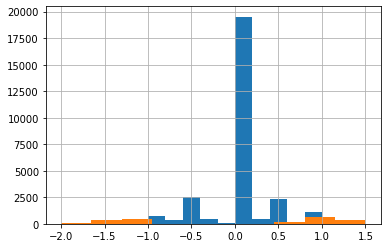

In [877]:
bot_days_data_filled.groupby("opinion_flip")['opinion_difference'].hist()

<Axes: >

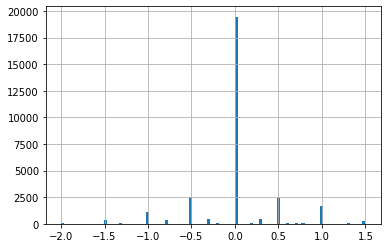

In [878]:
bot_days_data_filled['opinion_difference'].hist(bins=100)

In [840]:
bot_days_data_filled['opinion_difference'].value_counts().sort_index()

opinion_difference
-2.0       61
-1.5      366
-1.3       61
-1.0     1098
-0.8      366
-0.5     2501
-0.3      427
-0.2      122
 0.0    19459
 0.2       61
 0.3      488
 0.5     2379
 0.6       61
 0.7      122
 0.8      122
 1.0     1647
 1.3       61
 1.5      305
Name: count, dtype: int64

In [688]:
bot_days_data=pd.read_csv(p_in2+"bot_days_data_with_opinion_0306.csv")

In [882]:
matched.groupby('after')['climate_change_opinion'].mean()

after
0    0.412121
1    0.346104
Name: climate_change_opinion, dtype: float64

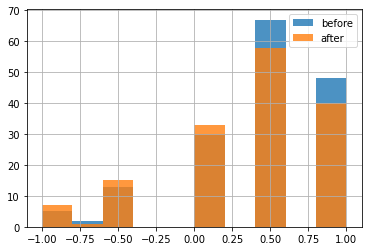

In [886]:
ax=matched[matched['after']==0]['climate_change_opinion'].hist(label='before', alpha=.8)
matched[matched['after']==1]['climate_change_opinion'].hist(label='after',ax=ax, alpha=.8)
ax.legend()

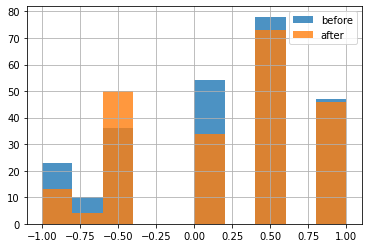

In [902]:
ax=bot_exposed[bot_exposed['after']==0]['climate_change_opinion'].hist(label='before', alpha=.8)
bot_exposed[bot_exposed['after']==1]['climate_change_opinion'].hist(label='after',ax=ax, alpha=.8)
ax.legend()

In [906]:
def bot_same_as_user(row):
    if row["user_interaction_opinion_cat"]==row['before_opinion_cat']:
        return 1
    else:
        return 0
    

In [907]:
bot_days_data_filled['same_bot_user_opinion']=bot_days_data_filled.apply(bot_same_as_user,1)

In [909]:
def bot_increased_support(row):
    if row['opinion_difference']>0:
        return 1
    else:
        return 0
bot_days_data_filled['increased_support']=bot_days_data_filled.apply(bot_increased_support,1)


def bot_decreased_support(row):
    if row['opinion_difference']<0:
        return 1
    else:
        return 0
bot_days_data_filled['decreased_support']=bot_days_data_filled.apply(bot_decreased_support,1)

In [941]:
bd=bot_days_data_filled[(bot_days_data_filled['bot_interaction']==1) &
                       (bot_days_data_filled['after']==1)]
chi2_contingency(pd.crosstab(bd['before_opinion_cat'],bd['user_interaction_opinion_cat']))

Chi2ContingencyResult(statistic=3620.467550822602, pvalue=0.0, dof=4, expected_freq=array([[ 774.07920792,  806.        ,  837.92079208],
       [ 893.16831683,  930.        ,  966.83168317],
       [1339.75247525, 1395.        , 1450.24752475]]))

In [944]:
pd.crosstab(bd['before_opinion_cat'],bd['user_interaction_opinion_cat'], normalize='index')

user_interaction_opinion_cat,negative,neutral,positive
before_opinion_cat,,,
negative,0.692308,0.205128,0.102564
neutral,0.166667,0.622222,0.211111
positive,0.207407,0.214815,0.577778


In [945]:
md=bot_days_data_filled[(bot_days_data_filled['bot_interaction']==0) &
                       (bot_days_data_filled['after']==1)]
print(chi2_contingency(pd.crosstab(md['before_opinion_cat'],md['same_bot_user_opinion'])))
pd.crosstab(md['before_opinion_cat'],md['user_interaction_opinion_cat'], normalize='index')

Chi2ContingencyResult(statistic=1308.8128087468106, pvalue=6.236051002595694e-285, dof=2, expected_freq=array([[ 513.52173913,  230.47826087],
       [ 898.66304348,  403.33695652],
       [2524.81521739, 1133.18478261]]))


user_interaction_opinion_cat,negative,neutral,positive
before_opinion_cat,,,
negative,0.125000,0.750000,0.125000
neutral,0.095238,0.714286,0.190476
positive,0.135593,0.661017,0.203390


In [952]:
pd.crosstab?

In [962]:
od_bot=pd.crosstab(index=bd['before_opinion_cat'],columns=bd['same_bot_user_opinion'],
            values=bd['opinion_difference'], aggfunc='mean')

In [963]:
od_match=pd.crosstab(index=md['before_opinion_cat'],columns=md['same_bot_user_opinion'],
            values=md['opinion_difference'], aggfunc='mean')

In [948]:
pd.crosstab(bd['same_bot_user_opinion'],bd['increased_support'])

increased_support,0,1
same_bot_user_opinion,,
0,2821,744
1,5053,775


In [950]:
pd.crosstab?

In [947]:
pd.crosstab(md['before_opinion_cat'],md['increased_support'])

increased_support,0,1
before_opinion_cat,,
negative,713,31
neutral,1240,62
positive,2604,1054


In [936]:
pd.crosstab(bd['before_opinion_cat'],bd['decreased_support'])

decreased_support,0,1
before_opinion_cat,,
negative,2684,2074
neutral,4880,610
positive,7381,854


In [938]:
pd.crosstab(md['before_opinion_cat'],md['decreased_support'])

decreased_support,0,1
before_opinion_cat,,
negative,854,610
neutral,2318,244
positive,6588,610


In [939]:
pd.crosstab(md['same_bot_user_opinion'],md['decreased_support'])

decreased_support,0,1
same_bot_user_opinion,,
0,6710,1037
1,3050,427


In [940]:
pd.crosstab(bd['same_bot_user_opinion'],bd['decreased_support'])

decreased_support,0,1
same_bot_user_opinion,,
0,5978,1037
1,8967,2501


In [917]:
pd.DataFrame(bot_days_data_filled.groupby(["bot_interaction",'before_opinion_cat',
                                           'same_bot_user_opinion'])['opinion_difference'].mean())

opinion_difference
bot_interaction before_opinion_cat same_bot_user_opinion                    
0               negative           0                               -0.347619
                                   1                               -0.666667
                neutral            0                               -0.166667
                                   1                                0.033333
                positive           0                                0.178723
                                   1                                0.137500
1               negative           0                               -0.233333
                                   1                               -0.359259
                neutral            0                               -0.097059
                                   1                               -0.044643
                positive           0                                0.192982
                                   1                                0.171795

In [660]:
bot_exposed.groupby('after')['climate_change_opinion'].mean()

after
0    0.144758
1    0.181364
Name: climate_change_opinion, dtype: float64

In [855]:
bot_exposed.T/bot_exposed.T.sum()

after,0,1
climate_cat,,
negative,0.278226,0.304545
neutral,0.205645,0.150000
positive,0.516129,0.545455


In [856]:
matched.T/matched.T.sum()

after,0,1
climate_cat,,
negative,0.121212,0.149351
neutral,0.181818,0.214286
positive,0.696970,0.636364


In [663]:
def create_cat(row):
    if row['climate_change_opinion']<0:
        return 'negative'
    elif row['climate_change_opinion']>0:
        return 'positive'
    else:
        return 'neutral'

In [664]:
bot_exposed['climate_cat']=bot_exposed.apply(create_cat,1)

In [665]:
matched['climate_cat']=matched.apply(create_cat,1)

In [844]:
bot_exposed=pd.crosstab(bot_exposed['after'],bot_exposed['climate_cat'])

KeyError: 'after'

In [845]:
matched=pd.crosstab(matched['after'],matched['climate_cat'])

KeyError: 'after'

In [684]:
from scipy.stats import chi2_contingency
print(chi2_contingency(bot_exposed))
print(chi2_contingency(matched))

Chi2ContingencyResult(statistic=2.4782764941186017, pvalue=0.28963370312170716, dof=2, expected_freq=array([[ 72.06837607,  44.51282051, 131.41880342],
       [ 63.93162393,  39.48717949, 116.58119658]]))
Chi2ContingencyResult(statistic=1.3312395599139324, pvalue=0.5139548900345824, dof=2, expected_freq=array([[ 22.24137931,  32.5862069 , 110.17241379],
       [ 20.75862069,  30.4137931 , 102.82758621]]))


In [679]:
#crosstab, test_results =chisquare(bot_exposed)

In [681]:
#import researchpy as rp

In [685]:
#test_results[0]